In [1]:
!pip install numpy

  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl (12.6 MB)



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas matplotlib 


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.6-cp312-cp312-win_amd64.whl.metadata (169 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.6-cp312-cp312-wi

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
import os
import cv2 as cv

import tensorflow as tf

In [65]:
#Loading dataset
train = r"C:\Users\Aishwarya Bhansali\resnet_classification\dataset\train"
val = r"C:\Users\Aishwarya Bhansali\resnet_classification\dataset\val"
test = r"C:\Users\Aishwarya Bhansali\resnet_classification\dataset\test"

In [66]:
def show_data(dataset):

  counts = []

  subdirectory = sorted(os.listdir(dataset))
  for subset in subdirectory:
    file_path = os.path.join(dataset, subset)

    if os.path.isdir(file_path):
      num_file = len(os.listdir(file_path))
      counts.append(num_file)
    else:
      counts.append(0)

  df = pd.DataFrame({'label': subdirectory, 'count':counts})

  return df

In [67]:
#Display training dataset
df = show_data(train)
df

,label,count
0,black,2420
1,blue,744
2,grey,486
3,red,720
4,white,1962
5,yellow,597


In [68]:
#Color classes in training dataset
class_subset_train = sorted(os.listdir(train))
class_subset_train

['black', 'blue', 'grey', 'red', 'white', 'yellow']

In [69]:

isize = 64

In [70]:

base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(isize, isize, 3), pooling='max')
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(rate=.5, seed=123)(x)
output = tf.keras.layers.Dense(len(class_subset_train), activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,123,014 (92.02 MB)

 Trainable params: 24,065,286 (91.80 MB)

 Non-trainable params: 57,728 (225.50 KB)

In [72]:

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    brightness_range=None,
    width_shift_range=0.5,
    rotation_range=False,
    horizontal_flip=True,
    vertical_flip=False
)

valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [73]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [74]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [75]:
def dataframe_keras(sourcedir):

    coll_labelnames = []
    coll_idfiles = []

    for label in os.listdir(sourcedir):
        label_dir = os.path.join(sourcedir, label)
        if os.path.isdir(label_dir):  # Ensure it's a directory
            idfiles = os.listdir(label_dir)
            labelnames = len(idfiles) * [label]

            coll_labelnames.append(labelnames)
            coll_idfiles.append([os.path.join(label, file) for file in idfiles])

    df = pd.DataFrame({'label': flatten(coll_labelnames), 'idfiles': flatten(coll_idfiles)})
    df['id'] = sourcedir + '/' + df['idfiles']


    return df

In [76]:
# Create DataFrames for train and validation datasets
traindf = dataframe_keras(train)
validdf = dataframe_keras(val)

In [77]:
traindf

,label,idfiles,id
0,black,black\00a3225ef6.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
1,black,black\0105a1c836.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
2,black,black\0124e36094.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
3,black,black\02db69e20c.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
4,black,black\03e58e36d0.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
...,...,...,...
6924,yellow,yellow\yellow_95.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
6925,yellow,yellow\yellow_96.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
6926,yellow,yellow\yellow_97.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
6927,yellow,yellow\yellow_98.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...


In [78]:
validdf

,label,idfiles,id
0,black,black\007ab0bb16.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
1,black,black\0098fde193.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
2,black,black\01f557e075.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
3,black,black\02df781fe3.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
4,black,black\0726587fbb.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
...,...,...,...
1692,yellow,yellow\f780e19f37.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
1693,yellow,yellow\faa39f359e.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
1694,yellow,yellow\faa910aa51.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...
1695,yellow,yellow\fc04d6c8f0.jpg,C:\Users\Aishwarya Bhansali\resnet_classificat...


In [79]:
BATCH_SIZE = 32

In [80]:
traingen=train_generator.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="id",
    y_col="label",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

validgen=valid_generator.flow_from_dataframe(
    dataframe=validdf,
    directory=None,
    x_col="id",
    y_col="label",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

Found 6929 validated image filenames belonging to 6 classes.
Found 1697 validated image filenames belonging to 6 classes.


In [45]:
!pip install --upgrade tensorflow keras

In [22]:
# Print the number of training and validation samples
print(f"Training samples: {traingen.samples}")
print(f"Validation samples: {validgen.samples}")

# Calculate steps per epoch and validation steps
BATCH_SIZE = 32  # Replace with the actual batch size you're using
steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

# Print steps per epoch and validation steps
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {val_steps}")

Training samples: 6929
Validation samples: 1697
Steps per epoch: 216
Validation steps: 53


In [23]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)


In [25]:
import math
import time
import tensorflow as tf

# Start time
t1 = time.time() / 60

# Ensure BATCH_SIZE is defined
BATCH_SIZE = 32  # Replace with your actual batch size

# Calculate steps per epoch and validation steps
steps_per_epoch = math.ceil(traingen.samples / BATCH_SIZE)
val_steps = math.ceil(validgen.samples / BATCH_SIZE)

# Print dataset details for debugging
print(f"Training samples: {traingen.samples}")
print(f"Validation samples: {validgen.samples}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {val_steps}")

# Define callbacks
csv_logger = tf.keras.callbacks.CSVLogger('training.log', separator=',', append=False)

checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath='ResNet50-model.best.keras',
    verbose=1,
    save_best_only=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    mode='min'
)

# Model training
history = model.fit(
    traingen,
    epochs=30,  # Number of epochs
    steps_per_epoch=steps_per_epoch,
    validation_data=validgen,
    validation_steps=val_steps,
    callbacks=[early_stop, checkpointer, csv_logger],
    verbose=True, )
t2 = time.time() / 60
print("Duration:", t2 - t1)


Training samples: 6929
Validation samples: 1697
Steps per epoch: 217
Validation steps: 54


C:\Users\Aishwarya Bhansali\resnet\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3759 - loss: 1.7606   

C:\Users\Aishwarya Bhansali\resnet\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 47.65177, saving model to ResNet50-model.best.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 764s 3s/step - accuracy: 0.3765 - loss: 1.7587 - val_accuracy: 0.1008 - val_loss: 47.6518
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7302 - loss: 0.7574  
Epoch 2: val_loss improved from 47.65177 to 39.86267, saving model to ResNet50-model.best.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.7303 - loss: 0.7571 - val_accuracy: 0.1019 - val_loss: 39.8627
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7894 - loss: 0.5834  
Epoch 3: val_loss improved from 39.86267 to 3.59837, saving model to ResNet50-model.best.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 655s 3s/step - accuracy: 0.7894 - loss: 0.5833 - val_accuracy: 0.2681 - val_loss: 3.5984
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8144 - loss: 0.5223  
Epoch 4: val_loss improved from 3.59837 to 1.39518, saving model to ResNet50-model.best.keras
217/21

In [26]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
model.save_weights("ResModel_weights.weights.h5")  

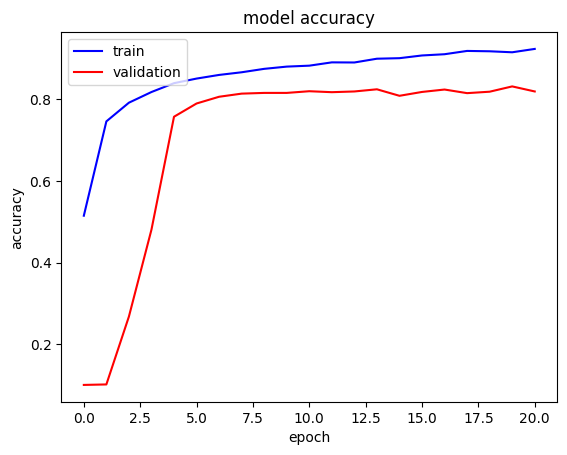

In [28]:
plt.plot(history.history['accuracy'], color='b', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
class_subset_test = sorted(os.listdir(test))
class_subset_test     

['black', 'blue', 'grey', 'red', 'white', 'yellow']

In [82]:
testgen = test_generator.flow_from_directory(  test,
                                               target_size=(isize, isize),
                                               batch_size=1,
                                               class_mode=None,
                                               classes=class_subset_test,
                                               shuffle=False
                                               )

Found 684 images belonging to 6 classes.


In [83]:
predict = model.predict(testgen)
predict

684/684 ━━━━━━━━━━━━━━━━━━━━ 71s 99ms/step 


array([[    0.17078,     0.11495,     0.50127,    0.047143,    0.051226,     0.11464],
       [    0.14404,     0.12879,      0.5134,    0.051727,    0.061393,     0.10065],
       [    0.15088,     0.14761,     0.44524,    0.064036,     0.07068,     0.12155],
       ...,
       [    0.16607,     0.14957,     0.45059,    0.048994,    0.048185,     0.13658],
       [    0.15274,     0.12941,      0.4933,     0.05523,    0.057826,      0.1115],
       [    0.16254,     0.14014,     0.46907,    0.053223,     0.06243,      0.1126]], dtype=float32)

In [84]:
df_testprediction = pd.DataFrame(predict, index=testgen.filenames, columns=class_subset_test)

In [85]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_testprediction

,black,blue,grey,red,white,yellow
black\019301dea8.jpg,0.1708,0.1150,0.5013,0.0471,0.0512,0.1146
black\070ed15b67.jpg,0.1440,0.1288,0.5134,0.0517,0.0614,0.1007
black\0ea1f11a35.jpg,0.1509,0.1476,0.4452,0.0640,0.0707,0.1215
black\10f08e9178.jpg,0.1880,0.1599,0.4380,0.0379,0.0422,0.1340
black\1e01b3da2b.jpg,0.1519,0.1506,0.4556,0.0455,0.0665,0.1299
...,...,...,...,...,...,...
yellow\fd1da2f797.jpg,0.1611,0.1480,0.4868,0.0471,0.0527,0.1044
yellow\fd3d2525fb.jpg,0.1421,0.1259,0.5104,0.0507,0.0558,0.1150
yellow\feacf53e9e.jpg,0.1661,0.1496,0.4506,0.0490,0.0482,0.1366
yellow\feeded3e6e.jpg,0.1527,0.1294,0.4933,0.0552,0.0578,0.1115


In [86]:
#prediction
predicted_classes = np.argmax(model.predict(testgen), axis=-1)
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

684/684 ━━━━━━━━━━━━━━━━━━━━ 69s 101ms/step


In [30]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
from sklearn import metrics

In [88]:
def display_results(y_true, y_preds, class_labels):

    results = pd.DataFrame(metrics.precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)

    results.sort_values(by='F-Score', ascending=False, inplace=True)
    global_acc = metrics.accuracy_score(y_true, y_preds)

    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

In [89]:
def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=40, replace=False)):
        ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]

        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]), color=("green" if pred_idx == true_idx else "red"))
    fig.savefig('testgallery.png')

In [90]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 13.45%


,Precision,Recall,F-Score,Support
grey,0.1345,1.0000,0.2371,92.0000
black,0.0000,0.0000,0.0000,87.0000
blue,0.0000,0.0000,0.0000,159.0000
red,0.0000,0.0000,0.0000,136.0000
white,0.0000,0.0000,0.0000,86.0000
yellow,0.0000,0.0000,0.0000,124.0000


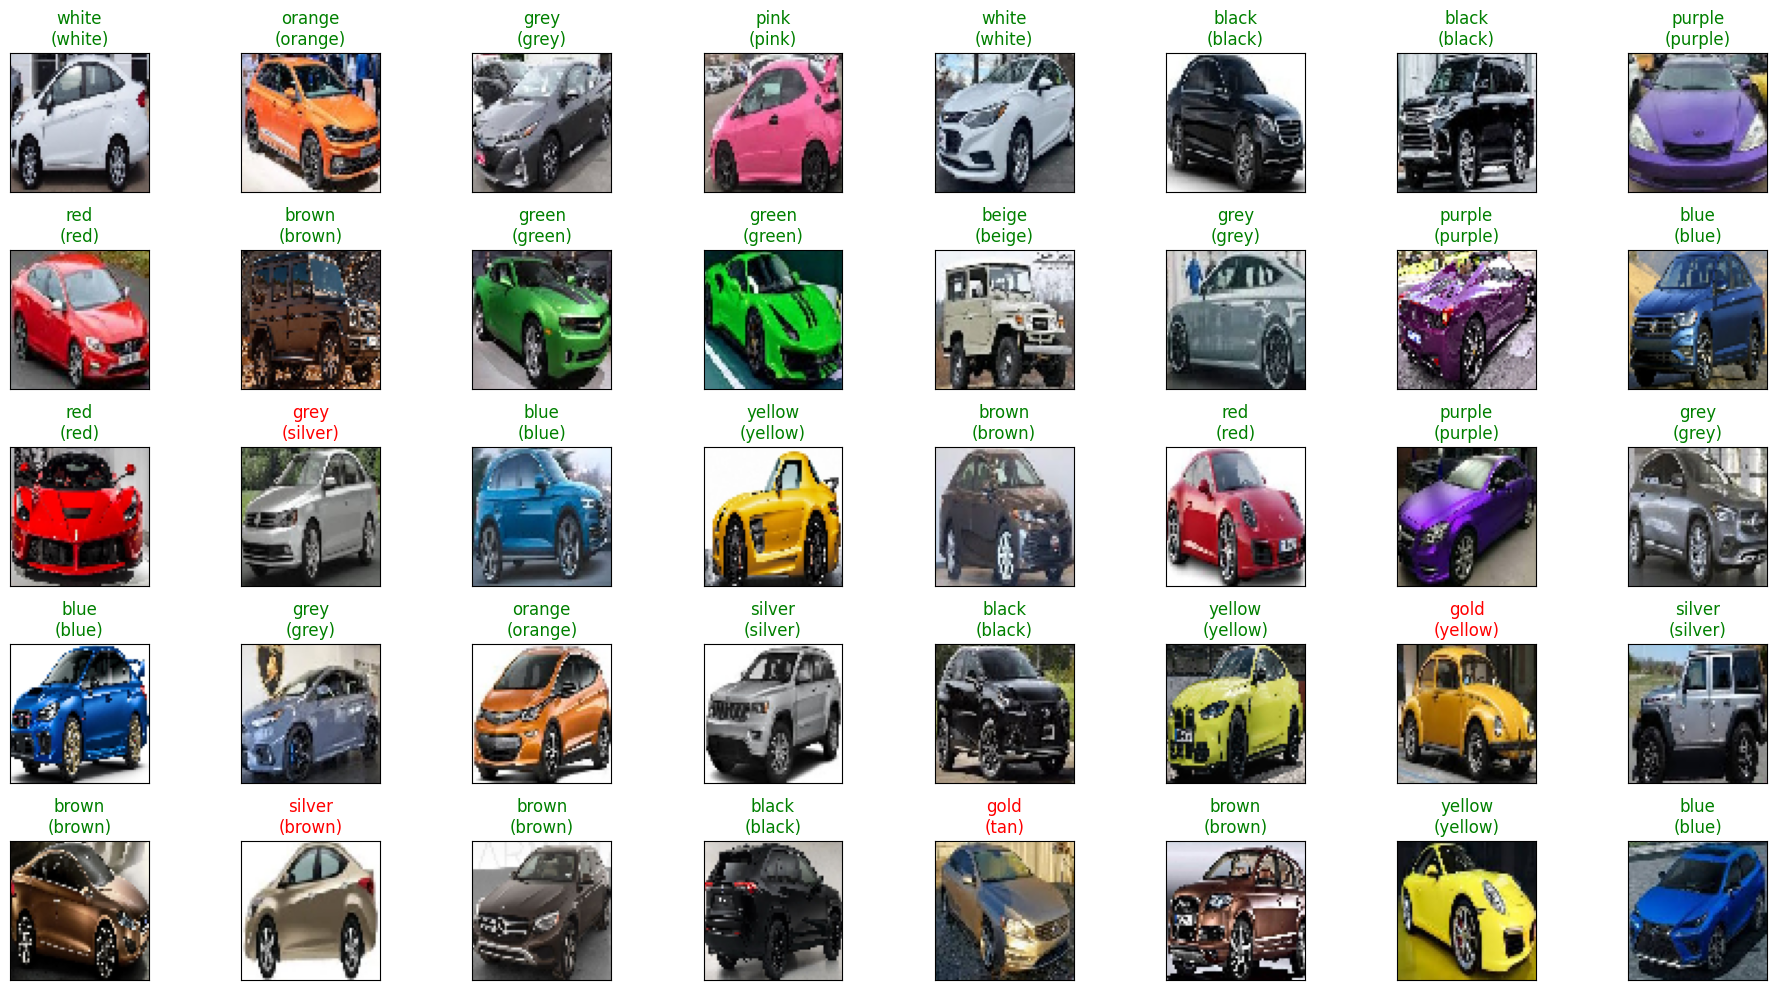

In [89]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [37]:
#Integrate
# Install Ultralytics library
!pip install ultralytics

  Using cached ultralytics-8.3.68-py3-none-any.whl.metadata (35 kB)
Using cached ultralytics-8.3.68-py3-none-any.whl (913 kB)



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!pip install numpy pandas matplotlib seaborn opencv-python Pillow ultralytics IPython


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [4]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO(r"C:\Users\Aishwarya Bhansali\OneDrive\Desktop\type_trained_yolo_dataset\runs\detect\train2\weights\best.pt")

In [5]:
#Load color model
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the pre-trained ResNet model
color_model = load_model(r"C:\Users\Aishwarya Bhansali\resnet_classification\ResNet50-model.best.keras")

# Show the summary of the loaded model
color_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 72,253,588 (275.63 MB)

 Trainable params: 24,065,286 (91.80 MB)

 Non-trainable params: 57,728 (225.50 KB)

 Optimizer params: 48,130,574 (183.60 MB)

In [47]:
#Integration of both models
import torch
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# 3. Load an Image for Detection
image = cv2.imread(r"C:\Users\Aishwarya Bhansali\OneDrive\Desktop\tcdetection\traffic11.jpg")  # Replace 'image.jpg' with your input image file

# 4. Perform Object Detection with YOLOv8
results = model(image)  # Run YOLOv8 on the image to detect objects

# 5. Extract the bounding boxes from the results (list)
boxes = results[0].boxes.xywh.numpy()  # Extract bounding boxes (xywh format) from results
# Convert to the format [x1, y1, x2, y2] for ROI extraction
boxes[:, 0] = boxes[:, 0] - boxes[:, 2] / 2  # x1 = x - width/2
boxes[:, 1] = boxes[:, 1] - boxes[:, 3] / 2  # y1 = y - height/2
boxes[:, 2] = boxes[:, 0] + boxes[:, 2]  # x2 = x1 + width
boxes[:, 3] = boxes[:, 1] + boxes[:, 3]  # y2 = y1 + height

# 6. Iterate through Detected Objects to Extract ROIs and Detect Color
for box in boxes:
    x1, y1, x2, y2 = map(int, box)  # Get bounding box coordinates
    roi = image[y1:y2, x1:x2]  # Extract Region of Interest (ROI) from the image

    # 7. Preprocess the ROI before feeding it to the color model
    roi_resized = cv2.resize(roi, (64, 64))  # Resize ROI to match color model's input size (100x100)
    roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize the image (assuming color model expects normalized input)
    
    # If your model expects RGB format, we need to convert BGR (OpenCV default) to RGB
    roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)

    # Add batch dimension (for model input)
    roi_input = np.expand_dims(roi_rgb, axis=0)

    # 8. Predict the color using the Keras color detection model
    predicted_color = color_model.predict(roi_input)

    # 9. Post-process the prediction
    predicted_class = np.argmax(predicted_color)  # Get the most likely color class
    
    # 10. Color Class Names based on your provided list
    color_labels = ['black', 'blue', 'grey', 'red', 'white', 'yellow']

    # 11. Visualize the Results on the Image
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw a green box around the object
    cv2.putText(image, color_labels[predicted_class], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 12. Display the Image with Detected Objects and Color Labels
cv2.imshow('Detected Objects with Color', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 480x640 13 cars, 2 trucks, 462.6ms
Speed: 16.1ms preprocess, 462.6ms inference, 15.9ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [ ]:
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 3. Load an Image for Detection
image = cv2.imread('/Users/aishwaryanalawade/Desktop/testing vehicle/road.jpg')  # Replace with your image path

# 4. Define Vehicle Type Names
vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']  # Adjust based on your YOLOv8 model training

# 5. Perform Object Detection with YOLOv8
results = model(image)

# 6. Iterate through Detected Objects
detections = results[0]  # Access first detection layer
for detection in detections.boxes:
    # Convert detection attributes to usable format
    box = detection.xyxy[0]  # Extract the bounding box as a tensor
    box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
    x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers

    class_id = int(detection.cls)  # Extract class ID
    vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name

    # Extract ROI
    roi = image[y1:y2, x1:x2]

    # Preprocess ROI for Color Classification
    roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
    roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
    roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension

    # Predict the color
    predicted_color = color_model.predict(roi_input)
    color_class = np.argmax(predicted_color)

    # Map Predicted Color Class to Labels
    color_labels = ['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']
    color_name = color_labels[color_class]

    # Draw Bounding Box and Labels on the Image
    label = f"{vehicle_type}, {color_name}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

# Display the Image with Labels
cv2.imshow('Detected Vehicles with Color', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 480x640 4 cars, 5 trucks, 60.2ms
Speed: 4.0ms preprocess, 60.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


2025-01-27 16:19:39.930 python[2979:89928] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 16:19:39.930 python[2979:89928] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 3. Load an Image for Detection
image = cv2.imread('/Users/aishwaryanalawade/Desktop/testing vehicle/new.webp')  # Replace with your image path

# 4. Define Vehicle Type Names
vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']  # Adjust based on your YOLOv8 model training

# 5. Perform Object Detection with YOLOv8
results = model(image)

# 6. Iterate through Detected Objects
detections = results[0]  # Access first detection layer
for detection in detections.boxes:
    # Convert detection attributes to usable format
    box = detection.xyxy[0]  # Extract the bounding box as a tensor
    box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
    x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers

    class_id = int(detection.cls)  # Extract class ID
    vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name

    # Extract ROI
    roi = image[y1:y2, x1:x2]

    # Preprocess ROI for Color Classification
    roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
    roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
    roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension

    # Predict the color
    predicted_color = color_model.predict(roi_input)
    color_class = np.argmax(predicted_color)

    # Map Predicted Color Class to Labels
    color_labels = ['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']
    color_name = color_labels[color_class]

    # Draw Bounding Box and Labels on the Image
    label = f"{vehicle_type}, {color_name}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

# Display the Image with Labels
cv2.imshow('Detected Vehicles with Color', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 480x640 2 trucks, 66.1ms
Speed: 4.8ms preprocess, 66.1ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


2025-01-27 16:22:23.784 python[3128:95994] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 16:22:23.784 python[3128:95994] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 3. Load an Image for Detection
image = cv2.imread('/Users/aishwaryanalawade/Desktop/testing vehicle/new.webp')  # Replace with your image path

# 4. Define Vehicle Type Names
vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']  # Adjust based on your YOLOv8 model training

# 5. Perform Object Detection with YOLOv8
results = model(image)

# 6. Iterate through Detected Objects
detections = results[0]  # Access first detection layer
for detection in detections.boxes:
    # Convert detection attributes to usable format
    box = detection.xyxy[0]  # Extract the bounding box as a tensor
    box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
    x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers

    class_id = int(detection.cls)  # Extract class ID
    vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name

    # Extract ROI
    roi = image[y1:y2, x1:x2]

    # Preprocess ROI for Color Classification
    roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
    roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
    roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension

    # Predict the color
    predicted_color = color_model.predict(roi_input)
    color_class = np.argmax(predicted_color)

    # Map Predicted Color Class to Labels
    color_labels = ['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']
    color_name = color_labels[color_class]

    # Draw Bounding Box and Labels on the Image
    label = f"{vehicle_type}, {color_name}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

# Save the Processed Image in Output Folder
output_path = '/Users/aishwaryanalawade/Desktop/op folder/op1.jpg'  # Replace with your desired output folder path and filename
cv2.imwrite(output_path, image)
print(f"Processed image saved at {output_path}")

# Optionally, display the Image with Labels
cv2.imshow('Detected Vehicles with Color', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 480x640 2 trucks, 60.1ms
Speed: 2.1ms preprocess, 60.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processed image saved at /Users/aishwaryanalawade/Desktop/op folder/op1.jpg


2025-01-27 16:29:43.758 python[3224:100470] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 16:29:43.758 python[3224:100470] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 1. Define Function for Vehicle Detection and Color Classification
def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Define Vehicle Type Labels
    vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']
    
    # Perform Object Detection with YOLOv8
    results = model(image)
    
    # Iterate through Detected Objects
    detections = results[0]  # Access first detection layer
    for detection in detections.boxes:
        # Convert detection attributes to usable format
        box = detection.xyxy[0]  # Extract the bounding box as a tensor
        box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
        x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers
        
        class_id = int(detection.cls)  # Extract class ID
        vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name
        
        # Extract ROI
        roi = image[y1:y2, x1:x2]
        
        # Preprocess ROI for Color Classification
        roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
        roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
        roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension
        
        # Predict the color
        predicted_color = color_model.predict(roi_input)
        color_class = np.argmax(predicted_color)
        
        # Map Predicted Color Class to Labels
        color_labels = ['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']
        color_name = color_labels[color_class]
        
        # Draw Bounding Box and Labels on the Image
        label = f"{vehicle_type}, {color_name}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label
    
    # Save the Processed Image in Output Folder
    cv2.imwrite(output_path, image)
    print(f"Processed image saved at {output_path}")

    # Display the Image (Optional)
    cv2.imshow('Detected Vehicles with Color', image)
    cv2.waitKey(1)  # Wait for a short duration (e.g., 1 ms) instead of indefinitely

# 2. Call the Function with Different Images
while True:
    image_path = input("Enter the path of the image to process (or 'quit' to exit): ")
    if image_path.lower() == 'quit':
        break  # Exit the loop if the user types 'quit'
    
    output_path = input("Enter the desired output path for the processed image: ")
    process_image(image_path, output_path)

cv2.destroyAllWindows()  # Close all OpenCV windows after exiting the loop


In [6]:
import os
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

model = YOLO(r"C:\Users\Aishwarya Bhansali\OneDrive\Desktop\type_trained_yolo_dataset\runs\detect\train2\weights\best.pt")

# Load the pre-trained ResNet model
color_model = load_model(r"C:\Users\Aishwarya Bhansali\resnet_classification\ResNet50-model.best.keras")

# 1. Define the Output Folder
output_folder = r"C:\Users\Aishwarya Bhansali\resnet_classification\output"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# 2. Load an Image for Detection
image_path = r"C:\Users\Aishwarya Bhansali\OneDrive\Desktop\tcdetection\traffic34.png"  # Replace with your image path
image = cv2.imread(image_path)

# 3. Define Vehicle Type Names
vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']  # Adjust based on your YOLOv8 model training

# 4. Perform Object Detection with YOLOv8
results = model(image)

# 5. Iterate through Detected Objects
detections = results[0]  # Access first detection layer
for detection in detections.boxes:
    # Convert detection attributes to usable format
    box = detection.xyxy[0]  # Extract the bounding box as a tensor
    box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
    x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers

    class_id = int(detection.cls)  # Extract class ID
    vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name

    # Extract ROI
    roi = image[y1:y2, x1:x2]

    # Preprocess ROI for Color Classification
    roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
    roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
    roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension

    # Predict the color
    predicted_color = color_model.predict(roi_input)
    color_class = np.argmax(predicted_color)

    # Map Predicted Color Class to Labels
    color_labels = ['black', 'blue', 'grey', 'red', 'white', 'yellow']
    color_name = color_labels[color_class]

    # Draw Bounding Box and Labels on the Image
    label = f"{vehicle_type}, {color_name}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

# 6. Save the Processed Image in the Output Folder
output_image_path = os.path.join(output_folder, 'output1.jpg')  # Output image path
cv2.imwrite(output_image_path, image)
print(f"Processed image saved at {output_image_path}")



0: 384x640 5 trucks, 693.7ms
Speed: 20.9ms preprocess, 693.7ms inference, 35.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Processed image saved at C:\Users\Aishwarya Bhansali\resnet_classification\output\output1.jpg


In [ ]:
#Video processing
import os
import torch
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 1. Define the Output Folder
output_folder = '/Users/aishwaryanalawade/Desktop/updated_folder'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# 2. Define Video Input and Output Paths
video_path = '/Users/aishwaryanalawade/vehicle /indian_road.mp4' # Replace with your video path
output_video_path = os.path.join(output_folder, 'indian_road_op.mp4')


# 4. Define Vehicle Type and Color Labels
vehicle_type_labels = ['car', 'motorcycle', 'bus', 'truck']  # Adjust based on your YOLOv8 training
color_labels = ['black', 'blue', 'grey', 'red', 'white', 'yellow']

# 5. Open Video for Reading and Get Video Properties
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize VideoWriter for Saving Processed Frames
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# 6. Process Video Frame by Frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform Object Detection with YOLOv8
    results = model(frame)
    detections = results[0]  # Access first detection layer

    for detection in detections.boxes:
        # Convert detection attributes to usable format
        box = detection.xyxy[0]  # Extract the bounding box as a tensor
        box = box.tolist() if hasattr(box, 'tolist') else box  # Ensure it's a list
        x1, y1, x2, y2 = map(int, box[:4])  # Extract and convert bounding box coordinates to integers

        class_id = int(detection.cls)  # Extract class ID
        vehicle_type = vehicle_type_labels[class_id]  # Get the vehicle type name

        # Extract ROI
        roi = frame[y1:y2, x1:x2]

        # Preprocess ROI for Color Classification
        roi_resized = cv2.resize(roi, (64, 64))  # Resize to match the input size of the color model
        roi_normalized = roi_resized.astype('float32') / 255.0  # Normalize pixel values
        roi_rgb = cv2.cvtColor(roi_normalized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        roi_input = np.expand_dims(roi_rgb, axis=0)  # Add batch dimension

        # Predict the color
        predicted_color = color_model.predict(roi_input)
        color_class = np.argmax(predicted_color)
        color_name = color_labels[color_class]

        # Draw Bounding Box and Labels on the Frame
        label = f"{vehicle_type}, {color_name}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

    # Write the Processed Frame to the Output Video
    out.write(frame)

# 7. Release Resources
cap.release()
out.release()
print(f"Processed video saved at {output_video_path}")